

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*


------

# Objective 

We are going to run a few experiments today

- Train a model with and without normalized data and investigate the weight values and learning outcomes
- Train a model with varying values for batch_size, learning_rate, and optimizers

We are essentially running mannual gridsearches on our models. In module 3, we'll learn a few different ways to automate gridseach for deep learning. 

In [2]:
import os
import datetime
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, ReLU
from sklearn.model_selection import train_test_split

from keras.optimizers import Adam, SGD, RMSprop, Nadam, Adadelta
from keras.activations import relu
from tensorflow.keras.callbacks import TensorBoard

In [3]:
%matplotlib inline
%load_ext tensorboard

### Load data

- Don't normalize your data just yet!

In [4]:
def load_quickdraw10():
    """
    Fill out this doc string, and comment the code, for practice in writing the kind of code that will get you hired. 
    """
    
    URL_ = "https://github.com/LambdaSchool/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/quickdraw10.npz?raw=true"
    
    path_to_zip = tf.keras.utils.get_file('./quickdraw10.npz', origin=URL_, extract=False)

    data = np.load(path_to_zip)

    X = data['arr_0']
    Y = data['arr_1']
        
    return train_test_split(X, Y, shuffle=True)

In [5]:
X_train, X_test, y_train, y_test = load_quickdraw10()

In [6]:
X_train.shape

(75000, 784)

In [7]:
X_test.shape

(25000, 784)

In [8]:
n_labels = len(np.unique(y_train))

In [9]:
n_labels

10

----
### Write a Model Function
- Write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. 

Your function `create_model` should accept the following parameters

- Learning Rate `lr`
- Optimizer `opt`


Build a model with the following architecture and parameter values

- Use `1 hidden layer` 
- Use `sigmoid` activation function in hidden layer
- Use `250 nodes` in hidden layer 
- Use `10 nodes` in output layer
- Use `softmax` activation fucntion in output layer
- Use `sparse_categorical_crossentropy` loss function
- Use `accuracy` as your metric 

We will use this function to build all the models that we'll need to run our experiments. 

In [10]:
def create_model(lr=.01, opt="adam"):
    """
    
    Build and returns a complies Keras model.  
    
    Parameters
    ----------
    lr: float
        Learing rate parameter used for Stocastic Gradient Descent 
        
    opt: string
        Name of optimizer to use
        Valid options are "adam" and "sgd"
        
    Returns
    -------
    model: keras object 
        A complied keras model 
    """

    if opt == "adam":
        opt = Adam(learning_rate=lr)
    elif opt == 'sgd':
        opt = SGD(learning_rate=lr)
    elif opt == "rmsprop":
        opt = RMSprop(learning_rate=lr)
    elif opt == "nadam":
        opt = Nadam(learning_rate=lr)
    elif opt == "adadelta":
        opt = Adadelta(learning_rate=lr)
    else:
        print ("{} is not a valid option. Defaulting to Adam optimizer".format(opt))
        opt = Adam(learning_rate=lr)

    # Instantiate model
    model = Sequential()
    
    # 1 Hidden layer, Input layer
    model.add(Dense(250,
                   activation="sigmoid",
                   input_dim=784))
    
    # Output layer
    model.add(Dense(n_labels,
                   activation="softmax"))
    
    # Compile 
    model.compile(optimizer=opt,
                 loss="sparse_categorical_crossentropy",
                 metrics="accuracy")
    
    return model

In [11]:
# a check on model architecture
model = create_model()
n_layers = len(model.get_config()["layers"])
output_act_funct =  model.get_config()["layers"][-1]["config"]["activation"]

assert n_layers == 3, "You should have an input, one hidden, and an output layer"
assert output_act_funct == "softmax", "Output act funct should be softmax"

------

# Experiment #1: How does normalized input data affect our model's learning outcome?

In this experiment we are going to answer the above question by training identifical models on a normalized data set and on a non-normalized data set. 

Then we will 

- Analyze the trained weight values of our model 
- Plot

In [12]:
# Clear any logs from previous runs
!rm -rf ./logs/

### Fit Model on Non-Normalized data

In [13]:
# fit model on non-normalized data

now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"No_Normalization-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

model = create_model(lr=.001, opt="adam")

model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          workers=-2, 
          epochs=10, 
          batch_size=32, 
          verbose=1, 
          callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 4s 2ms/step - loss: 1.1003 - accuracy: 0.6555 - val_loss: 0.8518 - val_accuracy: 0.74220s - loss: 1.1229 - ac
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.8187 - accuracy: 0.7475 - val_loss: 0.8215 - val_accuracy: 0.7493
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7883 - accuracy: 0.7563 - val_loss: 0.7729 - val_accuracy: 0.7638
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7642 - accuracy: 0.7622 - val_loss: 0.7592 - val_accuracy: 0.7703
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7343 - accuracy: 0.7740 - val_loss: 0.7479 - val_accuracy: 0.7733
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7344 - accuracy: 0.7718 - val_loss: 0.7513 - val_accuracy: 0.7683
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7208 - accuracy: 0.7767 - val_loss: 

---------

### Fit Model on Normalized data

In [14]:
# Normalize your training and test sets 
# save normalized data to X_train_scaled and X_test_scaled

max_pixel_value = X_train.max()
X_train_scaled = X_train / max_pixel_value
X_test_scaled = X_test / max_pixel_value

In [15]:
# train model on normalized data

now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs", f"Normalization-{now}")
tensorboard = TensorBoard(log_dir=logdir,  histogram_freq=1)

norm_model = create_model(lr=.001, opt="adam")

norm_model.fit(X_train_scaled, y_train, 
          validation_data=(X_test_scaled, y_test),
          workers=-2, 
          epochs=10, 
          batch_size=32, 
          verbose=1, 
          callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.9573 - accuracy: 0.7137 - val_loss: 0.6244 - val_accuracy: 0.8176
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.5716 - accuracy: 0.8309 - val_loss: 0.5344 - val_accuracy: 0.8414
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4746 - accuracy: 0.8599 - val_loss: 0.4860 - val_accuracy: 0.8570
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4094 - accuracy: 0.8776 - val_loss: 0.4768 - val_accuracy: 0.8580
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3655 - accuracy: 0.8918 - val_loss: 0.4602 - val_accuracy: 0.8639
Epoch 6/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.3313 - accuracy: 0.9023 - val_loss: 0.4562 - val_accuracy: 0.8644
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3007 - accuracy: 0.9123 - val_loss: 0.4442 - val_accuracy:

### Each layer is labeled

Take note of the label for each layer in the network. It is these labels that will help you identify the corresponding bias and weight distributions on tensorboard. 

Assuming that you've ran `create_model` 3 times: once for the model check, once to create `model`, and once to create `norm_model`:

The name of the layers for `model` should be 
- dense_2
- dense_3

The name of the layers for `norm_model` should be 
- dense_4
- dense_5


If you keep retraining one or both of these models, tensorflow will increment the integer used in the layer names.  But that doesn't really matter, just take notice of the layer names so you can find their corresponding bias and weight distribtuions in tensorboard.

**Protip:** If you want to reset the integer incrementation that tensorflow uses, you'll need to restart your notebook's kernal. 

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 250)               196250    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2510      
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________


In [20]:
norm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 250)               196250    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2510      
Total params: 198,760
Trainable params: 198,760
Non-trainable params: 0
_________________________________________________________________


### Tensorboard 

- Run the cell below to launch tensorboard 
- Click on the `SCALARS` tab to see plots that compare the loss and accuracy between the two models
- Cick on the `HISTOGRAMS` tab to see the distribution of the learned weights 

In [21]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6007 (pid 9444), started 1:05:30 ago. (Use '!kill 9444' to kill it.)

### Tensorboard 

Check out the loss and accuracy plots on the `SCALARS` tab. 

What you should see is that the accuracy is much higher for the model that was given normalized data; conversely, the loss is much lower for the model that was given normalized data. 

Recall that what we are doing whenever training a model is adjusting the value of the bias and weights in each layer. For simplicity of analysis, we only trained two layers: a hidden layer and the output layer. 

Now click on the `HISTOGRAM` tab. 

You should see both of your model's layer names. 

### Hidden Layer Distributions

Collapse the charts that correspond to the output layer so only the distributions for the weights and bias in the hidden layer are showing. (i.e. Only expand `dense_2` and `dense_4`). 

Also don't be confused by the word `kernel`, that's just the word that Tensorflow uses instead of weights. So, to be clear, **the kernal distributions are the weight values.** 

The `bias` distributions are the bias values. 

You should see 10 distributions stacked next to each other, **one distribution per epoch.**

The distribuion in the far back corresponds to the weight values at epoch 1 (tensorflow starts the count at 0, like the index for a list). The distribution at the very front corresponds to the weight values at the 10th epoch (tensorflow indexing show 9 instead of 10).

Notice how the shape of the distribution changes accross epochs? That's because their **values are being updated via Gradient Descent.** 

The distributions that you see are direclty responsible for the validation accuracy of our models. The reason why they look different between the two models is because one model was given normalize data and one wasn't. So you can conclude that the weight distributions in `dense_4` produce a higher validation accuracy than the weight distributions in `dense_2`. 

Now it's time to analyze those weight values more closely. 

----------
### Analyze Weights in Each Layer

In [22]:
# get the final bias and weight matrices for model
layer = model.get_layer(name="dense_2")
bias, weights = layer.get_weights()

In [23]:
# get the final value bias and weight magrices for norm_moel
layer = norm_model.get_layer(name="dense_4")
bias_norm, weights_norm = layer.get_weights()

In [24]:
# this line of code should not throw an error if the number of weights is the same for the hidden layer of both models
# this line of code is known as a Unit Test 
assert weights.shape[0] == weights_norm.shape[0]

### Initial Weight Values

By default, Keras dense layers randomly initialize the weight values using [**GlorotUniform**](https://keras.io/api/layers/initializers/). 

The cell below is sampling values from the GlorotUniform distribution. Let's sample from the GlorotUniform distribution and plot it in order to get a sense of the initial distribution of our weights - before Gradient Descent starts updating their values at training time. 

In [25]:
# let's take 250 random samples form the GlorotUniform
# because they are random samples their exact values might have been a little different for model and norm_model - but we will assume that they were not statistically different 
# 250 because that's how many weights are in the hidden layer for both of our models
initializer = tf.keras.initializers.GlorotUniform(seed=1234)
initial_weight_values = initializer(shape=(1, 250))

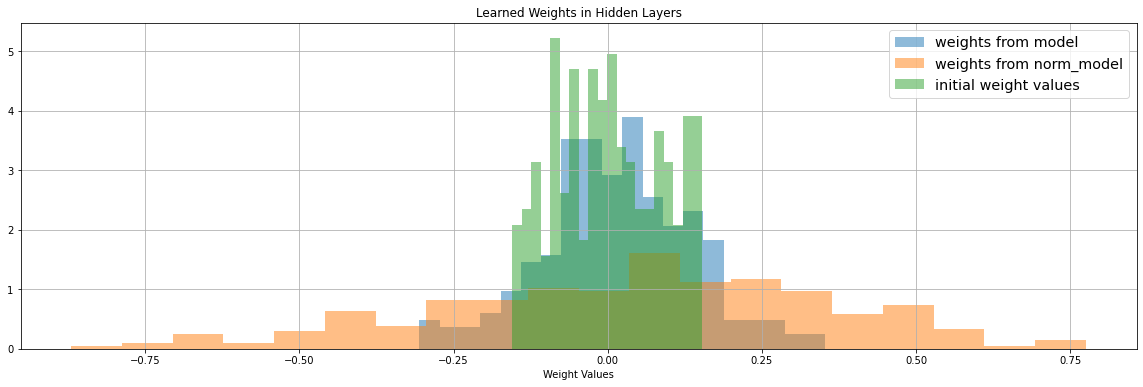

In [26]:
plt.figure(figsize=(20,6))
plt.title("Learned Weights in Hidden Layers")
plt.xlabel("Weight Values")
plt.grid()

# by setting density=True, we are transforming our plots into probability distributions 
plt.hist(weights, bins=20, alpha=0.5, label="weights from model", density=True);
plt.hist(weights_norm, bins=20, alpha=0.5, label="weights from norm_model", density=True);
plt.hist(initial_weight_values, bins=20, alpha=0.5, label="initial weight values", density=True);
plt.legend(fontsize="x-large");

### Observations

Your plot should have 3 distributions

- weights from model trained on non-normalized data
- weights from model trained on normalized data
- initial weight values sampled from a Glorot Uniform distributions 

Use the plot to answer the following questions.

**Comparing the initial weights with weights_from_model, what was the effect of not using normalized data?**

The weights did not change much, but it did distribute to a wider range than the initial weight values.

**Comparing the initial weights with weights_from_norm_model, what was the effect of using normalized data?**

Using normalized data helped distribute the weights into a wider range than the non-normalized data, certainly much more than the initial weight values. This helped increase the accuracy of the model and decrease the loss.

**Using your understanding of how Gradient Descent works, why do you think that the distributions between weights_from_model and weights_from_norm_model look so different?**

When the model takes in normalized data, the model is able to more efficiently learn the optimal parameters for each input node and minimize loss through gradient descent. That's because the data is within a much smaller range of values than a model that takes non-normalized data for training. It's easier for the model to work with normalized data because the larger variance of non-normalized data is no efficient or consistent.

----

# Additional Experiments

The previous experiment demonstrated the importance of normalizing our data in order to maximize model accuracy. In the next few experiments, we are going to explore the effect that certain values for Batch Size, Learning Rate, and different Optimizers have on model accuracy. 

Using our **create_model** model building function, conduct the following experiments. 

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [27]:
model_batch = create_model(lr=.001, opt="adam")

smallest = model_batch.fit(X_train_scaled,
                y_train, 
                validation_data=(X_test_scaled, y_test),
                workers=-2, 
                epochs=10, 
                batch_size=5, 
                verbose=1, 
                callbacks=[tensorboard])

Epoch 1/10
15000/15000 [==============================] - 16s 1ms/step - loss: 0.8143 - accuracy: 0.7512 - val_loss: 0.5308 - val_accuracy: 0.8432
Epoch 2/10
15000/15000 [==============================] - 16s 1ms/step - loss: 0.4722 - accuracy: 0.8566 - val_loss: 0.4939 - val_accuracy: 0.8554
Epoch 3/10
15000/15000 [==============================] - 16s 1ms/step - loss: 0.3846 - accuracy: 0.8830 - val_loss: 0.4635 - val_accuracy: 0.8646
Epoch 4/10
15000/15000 [==============================] - 15s 1ms/step - loss: 0.3275 - accuracy: 0.9011 - val_loss: 0.4543 - val_accuracy: 0.8702
Epoch 5/10
15000/15000 [==============================] - 15s 1ms/step - loss: 0.2828 - accuracy: 0.9152 - val_loss: 0.4593 - val_accuracy: 0.8704
Epoch 6/10
15000/15000 [==============================] - 16s 1ms/step - loss: 0.2403 - accuracy: 0.9271 - val_loss: 0.4732 - val_accuracy: 0.8700
Epoch 7/10
15000/15000 [==============================] - 17s 1ms/step - loss: 0.2139 - accuracy: 0.9350 - val_loss: 0

In [28]:
model_batch = create_model(lr=.001, opt="adam")

small = model_batch.fit(X_train_scaled,
                y_train, 
                validation_data=(X_test_scaled, y_test),
                workers=-2, 
                epochs=10, 
                batch_size=10, 
                verbose=1, 
                callbacks=[tensorboard])

Epoch 1/10
7500/7500 [==============================] - 8s 1ms/step - loss: 0.8556 - accuracy: 0.7405 - val_loss: 0.5611 - val_accuracy: 0.8322
Epoch 2/10
7500/7500 [==============================] - 8s 1ms/step - loss: 0.4957 - accuracy: 0.8501 - val_loss: 0.4868 - val_accuracy: 0.8559
Epoch 3/10
7500/7500 [==============================] - 9s 1ms/step - loss: 0.4061 - accuracy: 0.8791 - val_loss: 0.4714 - val_accuracy: 0.8626
Epoch 4/10
7500/7500 [==============================] - 8s 1ms/step - loss: 0.3502 - accuracy: 0.8956 - val_loss: 0.4611 - val_accuracy: 0.8650
Epoch 5/10
7500/7500 [==============================] - 8s 1ms/step - loss: 0.2992 - accuracy: 0.9103 - val_loss: 0.4502 - val_accuracy: 0.8716
Epoch 6/10
7500/7500 [==============================] - 8s 1ms/step - loss: 0.2623 - accuracy: 0.9221 - val_loss: 0.4634 - val_accuracy: 0.8698
Epoch 7/10
7500/7500 [==============================] - 8s 1ms/step - loss: 0.2361 - accuracy: 0.9300 - val_loss: 0.4721 - val_accuracy:

In [29]:
model_batch = create_model(lr=.001, opt="adam")

default = model_batch.fit(X_train_scaled,
                y_train, 
                validation_data=(X_test_scaled, y_test),
                workers=-2, 
                epochs=10, 
                batch_size=32, 
                verbose=1, 
                callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 4s 1ms/step - loss: 0.9452 - accuracy: 0.7176 - val_loss: 0.6303 - val_accuracy: 0.8162
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.5732 - accuracy: 0.8309 - val_loss: 0.5348 - val_accuracy: 0.8406
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4700 - accuracy: 0.8607 - val_loss: 0.4796 - val_accuracy: 0.8603
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4144 - accuracy: 0.8777 - val_loss: 0.4603 - val_accuracy: 0.8650
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3686 - accuracy: 0.8904 - val_loss: 0.4471 - val_accuracy: 0.8690
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3376 - accuracy: 0.9017 - val_loss: 0.4443 - val_accuracy: 0.8701
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3028 - accuracy: 0.9114 - val_loss: 0.4422 - val_accuracy:

In [30]:
model_batch = create_model(lr=.001, opt="adam")

big = model_batch.fit(X_train_scaled,
                y_train, 
                validation_data=(X_test_scaled, y_test),
                workers=-2, 
                epochs=10, 
                batch_size=64, 
                verbose=1, 
                callbacks=[tensorboard])

Epoch 1/10
1172/1172 [==============================] - 2s 2ms/step - loss: 1.0131 - accuracy: 0.7002 - val_loss: 0.6795 - val_accuracy: 0.8044
Epoch 2/10
1172/1172 [==============================] - 2s 2ms/step - loss: 0.6290 - accuracy: 0.8153 - val_loss: 0.5763 - val_accuracy: 0.8284
Epoch 3/10
1172/1172 [==============================] - 2s 2ms/step - loss: 0.5232 - accuracy: 0.8463 - val_loss: 0.5319 - val_accuracy: 0.8431
Epoch 4/10
1172/1172 [==============================] - 2s 2ms/step - loss: 0.4645 - accuracy: 0.8630 - val_loss: 0.4918 - val_accuracy: 0.8536
Epoch 5/10
1172/1172 [==============================] - 2s 2ms/step - loss: 0.4185 - accuracy: 0.8753 - val_loss: 0.4732 - val_accuracy: 0.8610
Epoch 6/10
1172/1172 [==============================] - 2s 2ms/step - loss: 0.3802 - accuracy: 0.8876 - val_loss: 0.4583 - val_accuracy: 0.8649
Epoch 7/10
1172/1172 [==============================] - 2s 2ms/step - loss: 0.3526 - accuracy: 0.8978 - val_loss: 0.4473 - val_accuracy:

In [31]:
model_batch = create_model(lr=.001, opt="adam")

biggest = model_batch.fit(X_train_scaled,
                y_train, 
                validation_data=(X_test_scaled, y_test),
                workers=-2, 
                epochs=10, 
                batch_size=256, 
                verbose=1, 
                callbacks=[tensorboard])

Epoch 1/10
293/293 [==============================] - 1s 3ms/step - loss: 1.2513 - accuracy: 0.6301 - val_loss: 0.8000 - val_accuracy: 0.7688
Epoch 2/10
293/293 [==============================] - 1s 3ms/step - loss: 0.7624 - accuracy: 0.7784 - val_loss: 0.7117 - val_accuracy: 0.7954
Epoch 3/10
293/293 [==============================] - 1s 3ms/step - loss: 0.6716 - accuracy: 0.8030 - val_loss: 0.6409 - val_accuracy: 0.8141
Epoch 4/10
293/293 [==============================] - 1s 3ms/step - loss: 0.5950 - accuracy: 0.8270 - val_loss: 0.5940 - val_accuracy: 0.8260
Epoch 5/10
293/293 [==============================] - 1s 3ms/step - loss: 0.5491 - accuracy: 0.8403 - val_loss: 0.5637 - val_accuracy: 0.8358
Epoch 6/10
293/293 [==============================] - 1s 3ms/step - loss: 0.5029 - accuracy: 0.8531 - val_loss: 0.5337 - val_accuracy: 0.8431
Epoch 7/10
293/293 [==============================] - 1s 3ms/step - loss: 0.4812 - accuracy: 0.8580 - val_loss: 0.5107 - val_accuracy: 0.8499
Epoch 

In [34]:
biggest.history.summary()

AttributeError: 'dict' object has no attribute 'summary'

In [32]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6007 (pid 9444), started 1:10:50 ago. (Use '!kill 9444' to kill it.)

In [33]:
import seaborn as sns

batch_sizes = []

for exp, result in zip([smallest, small, default, big, biggest], ["5_", "10_", "32_", "64_", "256_"]):

    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result

    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.663872,0.798587,0.525787,0.84472,0,5_
1,0.462311,0.861440,0.470708,0.85860,1,5_
2,0.388520,0.883093,0.468244,0.86316,2,5_
3,0.334823,0.899307,0.450477,0.87080,3,5_
4,0.291048,0.912640,0.453761,0.87064,4,5_


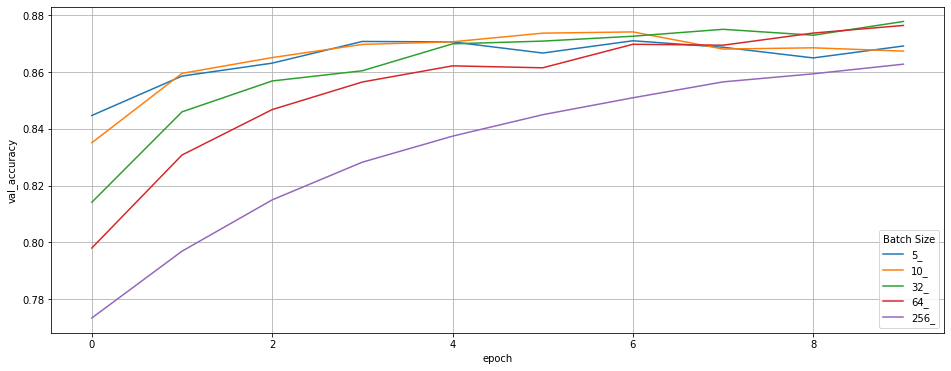

In [34]:
plt.figure(figsize=(16,6))
plt.grid()
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

# Batch Size Analysis

Of the various batch sizes that I ran in these five experiments, the default value of batch size = 32 performed the best on the validation data. Here is a ranking of the performances of each batch size on the validation data.

1.) Batch size = 32
2.) 64
3.) 5
4.) 10
5.) 256

We should observe that smaller batch sizes perform better (theoretically) because smaller batch sizes means the model must update the parameter weights more often in each epoch. This was not the case, seeing that batch size = 64 performed better on validation data than batch size = 5, 10. 

It's also important to note that the validation accuracy of all 5 batch sizes were similar towards the 10th epoch and that a lot of overlapping occurred. So it would be interesting to see further how number of epochs would affect these validation accuracy score by batch size.

The Adam optimizer model from yesterday performed better on the validation set (0.8814) than this model (0.8778), but this model did not overfit the training data like the Adam optimizer model from yesterday. It's also important to mention that yesterday's Adam model ran 20 epochs rather than today's model's 10 epochs.

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [35]:
model_lr = create_model(lr=.0001, opt="adam")

model_0001 = model_lr.fit(X_train_scaled,
                y_train, 
                validation_data=(X_test_scaled, y_test),
                workers=-2, 
                epochs=10, 
                batch_size=32, 
                verbose=1, 
                callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.4449 - accuracy: 0.6014 - val_loss: 0.8976 - val_accuracy: 0.7436
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.8555 - accuracy: 0.7546 - val_loss: 0.8110 - val_accuracy: 0.7666
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7866 - accuracy: 0.7743 - val_loss: 0.7649 - val_accuracy: 0.7788
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7445 - accuracy: 0.7844 - val_loss: 0.7258 - val_accuracy: 0.7895
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6971 - accuracy: 0.7974 - val_loss: 0.6958 - val_accuracy: 0.7993
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6731 - accuracy: 0.8060 - val_loss: 0.6686 - val_accuracy: 0.8069
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.6406 - accuracy: 0.8129 - val_loss: 0.6459 - val_accuracy:

In [36]:
model_lr = create_model(lr=.001, opt="adam")

model_001 = model_lr.fit(X_train_scaled,
                y_train, 
                validation_data=(X_test_scaled, y_test),
                workers=-2, 
                epochs=10, 
                batch_size=32, 
                verbose=1, 
                callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.9459 - accuracy: 0.7195 - val_loss: 0.6194 - val_accuracy: 0.8198
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.5793 - accuracy: 0.8290 - val_loss: 0.5231 - val_accuracy: 0.8472
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4736 - accuracy: 0.8604 - val_loss: 0.4844 - val_accuracy: 0.8547
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4175 - accuracy: 0.8774 - val_loss: 0.4613 - val_accuracy: 0.8658
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3676 - accuracy: 0.8927 - val_loss: 0.4412 - val_accuracy: 0.8705
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3388 - accuracy: 0.9006 - val_loss: 0.4381 - val_accuracy: 0.8718
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3020 - accuracy: 0.9118 - val_loss: 0.4482 - val_accuracy:

In [46]:
model_lr = create_model(lr=.01, opt="adam")

model_01 = model_lr.fit(X_train_scaled,
                y_train, 
                validation_data=(X_test_scaled, y_test),
                workers=-2, 
                epochs=10, 
                batch_size=32, 
                verbose=1, 
                callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.7727 - accuracy: 0.7602 - val_loss: 0.5669 - val_accuracy: 0.8320
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.5344 - accuracy: 0.8378 - val_loss: 0.5473 - val_accuracy: 0.8363
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4923 - accuracy: 0.8498 - val_loss: 0.5691 - val_accuracy: 0.8341
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4639 - accuracy: 0.8598 - val_loss: 0.5374 - val_accuracy: 0.8420
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4379 - accuracy: 0.8652 - val_loss: 0.5732 - val_accuracy: 0.8354
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4346 - accuracy: 0.8688 - val_loss: 0.5490 - val_accuracy: 0.8428
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4076 - accuracy: 0.8742 - val_loss: 0.5698 - val_accuracy:

In [38]:
model_lr = create_model(lr=.1, opt="adam")

model_1 = model_lr.fit(X_train_scaled,
                y_train, 
                validation_data=(X_test_scaled, y_test),
                workers=-2, 
                epochs=10, 
                batch_size=32, 
                verbose=1, 
                callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.2936 - accuracy: 0.6045 - val_loss: 1.0794 - val_accuracy: 0.6776
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.0212 - accuracy: 0.6871 - val_loss: 0.9841 - val_accuracy: 0.7013
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.0075 - accuracy: 0.6946 - val_loss: 1.0983 - val_accuracy: 0.6668
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.9725 - accuracy: 0.7060 - val_loss: 0.9817 - val_accuracy: 0.7058
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.9271 - accuracy: 0.7210 - val_loss: 0.9704 - val_accuracy: 0.7101
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.9297 - accuracy: 0.7203 - val_loss: 0.9246 - val_accuracy: 0.7258
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.9197 - accuracy: 0.7182 - val_loss: 1.0094 - val_accuracy:

In [39]:
model_lr = create_model(lr=1, opt="adam")

model_1b = model_lr.fit(X_train_scaled,
                y_train, 
                validation_data=(X_test_scaled, y_test),
                workers=-2, 
                epochs=10, 
                batch_size=32, 
                verbose=1, 
                callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 4s 1ms/step - loss: 13.6644 - accuracy: 0.3842 - val_loss: 14.6784 - val_accuracy: 0.3518
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 11.5031 - accuracy: 0.4138 - val_loss: 21.5466 - val_accuracy: 0.3235
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 11.4052 - accuracy: 0.4269 - val_loss: 12.8451 - val_accuracy: 0.4674
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 10.6123 - accuracy: 0.4422 - val_loss: 8.3124 - val_accuracy: 0.4276
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 9.8359 - accuracy: 0.4781 - val_loss: 8.5441 - val_accuracy: 0.5210
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 9.9675 - accuracy: 0.4885 - val_loss: 9.2939 - val_accuracy: 0.5209
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 10.1330 - accuracy: 0.4947 - val_loss: 8.3393 - val_a

# Learning Rates Analysis

The different learning rates that I used for this experiment were: 0.0001, 0.001, 0.01, 0.1, and 1.0. These learning rates produced a final validation accuracy of 0.8270, 0.8712, 0.8494, 0.7526, and 0.4684, respectively. 

Learning Rate = 0.001 performed the best for my model with a validation accuracy of 0.8712. This performed worse than my adam model yesterday with a validation accuracy of 0.8814.

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [50]:
model_opt = create_model(lr=0.001, opt="adam")

model_adam = model_opt.fit(X_train_scaled,
                y_train, 
                validation_data=(X_test_scaled, y_test),
                workers=-2, 
                epochs=10, 
                batch_size=32, 
                verbose=1, 
                callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.9404 - accuracy: 0.7199 - val_loss: 0.6247 - val_accuracy: 0.8172
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.5685 - accuracy: 0.8321 - val_loss: 0.5246 - val_accuracy: 0.8440
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4698 - accuracy: 0.8604 - val_loss: 0.4860 - val_accuracy: 0.8556
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4080 - accuracy: 0.8782 - val_loss: 0.4682 - val_accuracy: 0.8605
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3650 - accuracy: 0.8923 - val_loss: 0.4432 - val_accuracy: 0.8712
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3345 - accuracy: 0.9015 - val_loss: 0.4367 - val_accuracy: 0.8724
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.3021 - accuracy: 0.9099 - val_loss: 0.4340 - val_accuracy:

In [51]:
model_opt = create_model(lr=0.001, opt="sgd")

model_sgd = model_opt.fit(X_train_scaled,
                y_train, 
                validation_data=(X_test_scaled, y_test),
                workers=-2, 
                epochs=10, 
                batch_size=32, 
                verbose=1, 
                callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 3s 1ms/step - loss: 2.2568 - accuracy: 0.2244 - val_loss: 2.0491 - val_accuracy: 0.4859
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.9909 - accuracy: 0.5145 - val_loss: 1.8315 - val_accuracy: 0.5823
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.7801 - accuracy: 0.5979 - val_loss: 1.6502 - val_accuracy: 0.6274
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.6062 - accuracy: 0.6356 - val_loss: 1.5079 - val_accuracy: 0.6485
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.4772 - accuracy: 0.6523 - val_loss: 1.3996 - val_accuracy: 0.6658
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.3762 - accuracy: 0.6658 - val_loss: 1.3172 - val_accuracy: 0.6719
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.2958 - accuracy: 0.6749 - val_loss: 1.2531 - val_accuracy:

In [54]:
model_opt = create_model(lr=0.001, opt="rmsprop")

model_rmsprop = model_opt.fit(X_train_scaled,
                y_train, 
                validation_data=(X_test_scaled, y_test),
                workers=-2, 
                epochs=10, 
                batch_size=32, 
                verbose=1, 
                callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.9282 - accuracy: 0.7239 - val_loss: 0.6202 - val_accuracy: 0.8198
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.5682 - accuracy: 0.8325 - val_loss: 0.5279 - val_accuracy: 0.8458
Epoch 3/10
2344/2344 [==============================] - 3s 1ms/step - loss: 0.4848 - accuracy: 0.8561 - val_loss: 0.4942 - val_accuracy: 0.8553
Epoch 4/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.4252 - accuracy: 0.8741 - val_loss: 0.4849 - val_accuracy: 0.8610
Epoch 5/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.3842 - accuracy: 0.8879 - val_loss: 0.4588 - val_accuracy: 0.8668
Epoch 6/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.3576 - accuracy: 0.8944 - val_loss: 0.4602 - val_accuracy: 0.8678
Epoch 7/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.3324 - accuracy: 0.9035 - val_loss: 0.4500 - val_accuracy:

In [55]:
model_opt = create_model(lr=0.001, opt="nadam")

model_nadam = model_opt.fit(X_train_scaled,
                y_train, 
                validation_data=(X_test_scaled, y_test),
                workers=-2, 
                epochs=10, 
                batch_size=32, 
                verbose=1, 
                callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 5s 2ms/step - loss: 0.9507 - accuracy: 0.7198 - val_loss: 0.6270 - val_accuracy: 0.8156
Epoch 2/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.5739 - accuracy: 0.8295 - val_loss: 0.5330 - val_accuracy: 0.8410
Epoch 3/10
2344/2344 [==============================] - 5s 2ms/step - loss: 0.4681 - accuracy: 0.8610 - val_loss: 0.4860 - val_accuracy: 0.8567
Epoch 4/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.4145 - accuracy: 0.8763 - val_loss: 0.4709 - val_accuracy: 0.8594
Epoch 5/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.3695 - accuracy: 0.8905 - val_loss: 0.4406 - val_accuracy: 0.8706
Epoch 6/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.3298 - accuracy: 0.9031 - val_loss: 0.4425 - val_accuracy: 0.8691
Epoch 7/10
2344/2344 [==============================] - 4s 2ms/step - loss: 0.3000 - accuracy: 0.9128 - val_loss: 0.4276 - val_accuracy:

In [56]:
model_opt = create_model(lr=0.001, opt="adadelta")

model_adadelta = model_opt.fit(X_train_scaled,
                y_train, 
                validation_data=(X_test_scaled, y_test),
                workers=-2, 
                epochs=10, 
                batch_size=32, 
                verbose=1, 
                callbacks=[tensorboard])

Epoch 1/10
2344/2344 [==============================] - 4s 2ms/step - loss: 2.3815 - accuracy: 0.1071 - val_loss: 2.2272 - val_accuracy: 0.1827
Epoch 2/10
2344/2344 [==============================] - 3s 1ms/step - loss: 2.1877 - accuracy: 0.2386 - val_loss: 2.1015 - val_accuracy: 0.3554
Epoch 3/10
2344/2344 [==============================] - 4s 1ms/step - loss: 2.0723 - accuracy: 0.3907 - val_loss: 2.0052 - val_accuracy: 0.4636
Epoch 4/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.9791 - accuracy: 0.4915 - val_loss: 1.9208 - val_accuracy: 0.5299
Epoch 5/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.8982 - accuracy: 0.5429 - val_loss: 1.8451 - val_accuracy: 0.5650
Epoch 6/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.8202 - accuracy: 0.5820 - val_loss: 1.7770 - val_accuracy: 0.5895
Epoch 7/10
2344/2344 [==============================] - 3s 1ms/step - loss: 1.7560 - accuracy: 0.6006 - val_loss: 1.7160 - val_accuracy:

# Optimizers Analysis

The optimizers I experimented with were Adam, SGD, RMSprop, Nadam, and Adadelta. They produced validation accuracies of 0.8736, 0.6998, 0.8693, 0.8760, and 0.6364, respectively. Here is the order of performance:

1.) Nadam - 0.8760
2.) Adam - 0.8736
3.) RMSprop - 0.8693
4.) SGD - 0.6998
5.) Adadelta - 0.6364

The Nadam model still doesn't live up to yesterday's Adam model, but I suspect that is because yesterday's model trained on 20 epochs, whereas this Nadam model only trained on 10 epochs. I am going to run the Nadam model on 20 epochs and see how it performs against yesterday's Adam model. Remember, yesterday's model had a validation accuracy of 0.8814 (and also overfit training data).

In [57]:
model_opt = create_model(lr=0.001, opt="nadam")

model_nadam_20_epochs = model_opt.fit(X_train_scaled,
                y_train, 
                validation_data=(X_test_scaled, y_test),
                workers=-2, 
                epochs=20, 
                batch_size=32, 
                verbose=1, 
                callbacks=[tensorboard])

Epoch 1/20
2344/2344 [==============================] - 5s 2ms/step - loss: 0.9615 - accuracy: 0.7125 - val_loss: 0.6298 - val_accuracy: 0.8144
Epoch 2/20
2344/2344 [==============================] - 4s 2ms/step - loss: 0.5744 - accuracy: 0.8312 - val_loss: 0.5205 - val_accuracy: 0.8464
Epoch 3/20
2344/2344 [==============================] - 5s 2ms/step - loss: 0.4635 - accuracy: 0.8638 - val_loss: 0.4762 - val_accuracy: 0.8591
Epoch 4/20
2344/2344 [==============================] - 5s 2ms/step - loss: 0.4101 - accuracy: 0.8785 - val_loss: 0.4617 - val_accuracy: 0.8644
Epoch 5/20
2344/2344 [==============================] - 5s 2ms/step - loss: 0.3705 - accuracy: 0.8911 - val_loss: 0.4407 - val_accuracy: 0.8714
Epoch 6/20
2344/2344 [==============================] - 4s 2ms/step - loss: 0.3309 - accuracy: 0.9040 - val_loss: 0.4352 - val_accuracy: 0.8731
Epoch 7/20
2344/2344 [==============================] - 4s 2ms/step - loss: 0.3015 - accuracy: 0.9114 - val_loss: 0.4309 - val_accuracy:

It looks like after 11 epochs, the model does not improve, and doesn't beat yesterday's Adam model. I'm going to guess this is due to yesterday's model having 3 hidden layers, whereas this Nadam model only has 1 hidden layer.

------

## Stretch Goals: 

- On the learning rate experiments, implement [EarlyStopping](https://keras.io/api/callbacks/early_stopping/)
- Review the math of Gradient Descent. 